In [36]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

Question #1

In [62]:
A = np.array([[3,1],[1,3]])
def prob1(A,k=A.shape[0]):
    n = A.shape[0]
    AHA = np.conj(A) @ A
    eigs,vecs = la.eig(A)
    sorting = np.argsort(eigs)
    vecs = vecs[sorting]
    eigs = np.sqrt(eigs[sorting])
    sigs = eigs[:k]
    sigma = np.diag(sigs)
    V = vecs[:,:k]
    U = (1/sigs)*(A@V)
    return U,sigma,V

U,S,V = prob1(A,3)
print(U,S,V)

[[ 2.          0.70710678]
 [ 2.         -0.70710678]] [[ 1.41421356  0.        ]
 [ 0.          2.        ]] [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


Question #2

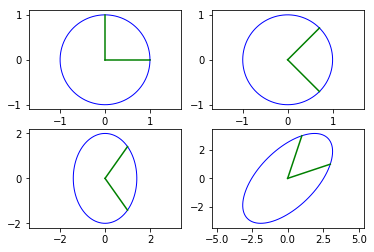

In [63]:
def prob2(A):
    grid = np.linspace(0,2*np.pi,100)
    U,sigma,V = prob1(A,2)
    X,Y = np.cos(grid),np.sin(grid)
    S = np.array((X,Y))
    VH = np.conj(V).T
    
    e1 = np.array([0,1])
    e2 = np.array([1,0])
    
    plt.subplot(221)
    plt.plot((S)[0], (S)[1], color='blue', lw=1)
    plt.plot([0,e1[0]], [0,e1[1]], color='green')
    plt.plot([0,e2[0]], [0,e2[1]], color='green')
    plt.axis("equal")
    
    plt.subplot(222)
    plt.plot((V@S)[0], (V@S)[1], color='blue', lw=1)
    plt.plot([0,(V@e1)[0]], [0, (V@e1)[1]], color='green')
    plt.plot([0,(V@e2)[0]], [0, (V@e2)[1]], color='green')
    plt.axis("equal")
 
    plt.subplot(223)
    plt.plot((sigma@V@S)[0], (sigma@V@S)[1], color='blue', lw=1)
    plt.plot([0,(sigma@V@e1)[0]], [0, (sigma@V@e1)[1]], color='green')
    plt.plot([0,(sigma@V@e2)[0]], [0, (sigma@V@e2)[1]], color='green')
    plt.axis("equal")
    
    plt.subplot(224)
    plt.plot((U@sigma@V@S)[0], (U@sigma@V@S)[1], color='blue', lw=1)
    plt.plot([0,(U@sigma@V@e1)[0]], [0, (U@sigma@V@e1)[1]], color='green')
    plt.plot([0,(U@sigma@V@e2)[0]], [0, (U@sigma@V@e2)[1]], color='green')
    plt.axis("equal")
    
    plt.show()

prob2(np.array([[3,1],[1,3]]))

Question #3

In [78]:
def prob3(A,k):
    U,sigma,Vh = la.svd(A, full_matrices=False)
    rank = np.zeros((U.shape[0],Vh.shape[0]))
    for i in range(k):
        rank = rank + sigma[i] * np.outer(U.T[i], Vh[i])
    return rank

prob3(A,2)

array([[ 3.,  1.],
       [ 1.,  3.]])

Question #4

In [92]:
def prob4(A,e):
    U,sigma,Vh = la.svd(A, full_matrices=False)
    smax = sigma[0]
    n = len(sigma)
    for i in range(n+1):
        B = prob3(A,i)
        d = abs(smax - la.norm(A - B))
        if d < e:
            return B
    return "ERROR: no sub-k rank matrix"

prob4(A,0.8)

array([[ 0.,  0.],
       [ 0.,  0.]])

Question #5

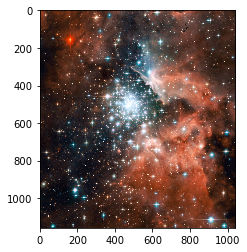

In [75]:
def prob5(file,k):
    pic = plt.imread(file)
    R = pic[:,:,0]
    G = pic[:,:,1]
    B = pic[:,:,2]
    colors = [R,G,B]
    
    for g in colors:
        g = np.divide(g,255)
        g = prob3(g,k)
        g[g>1] = 1
        g[g<0] = 0
    
    plt.imshow(np.dstack((colors[0],colors[1],colors[2])))
    return plt.show()

prob5("hubble.jpg",20)